# Exemplo de clustering com K-means

### Instalar módulos python necessários

In [1]:
#!pip install pandas sklearn matplotlib seaborn

### Importar os módulos e funções necessários

In [2]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

#### Variáveis globais

In [3]:
COLORS = {
    0: "red",
    1: "blue",
    2: "black",
    3: "green",
    4: "orange",
    5: "gray",
    6: "pink",
}

## Carregar conjunto de dados sobre clientes de um centro comercial
(fonte: https://www.kaggle.com/datasets/shwetabh123/mall-customers)

In [4]:
d = pd.read_csv("customers.csv")
d

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Análise visual dos dados

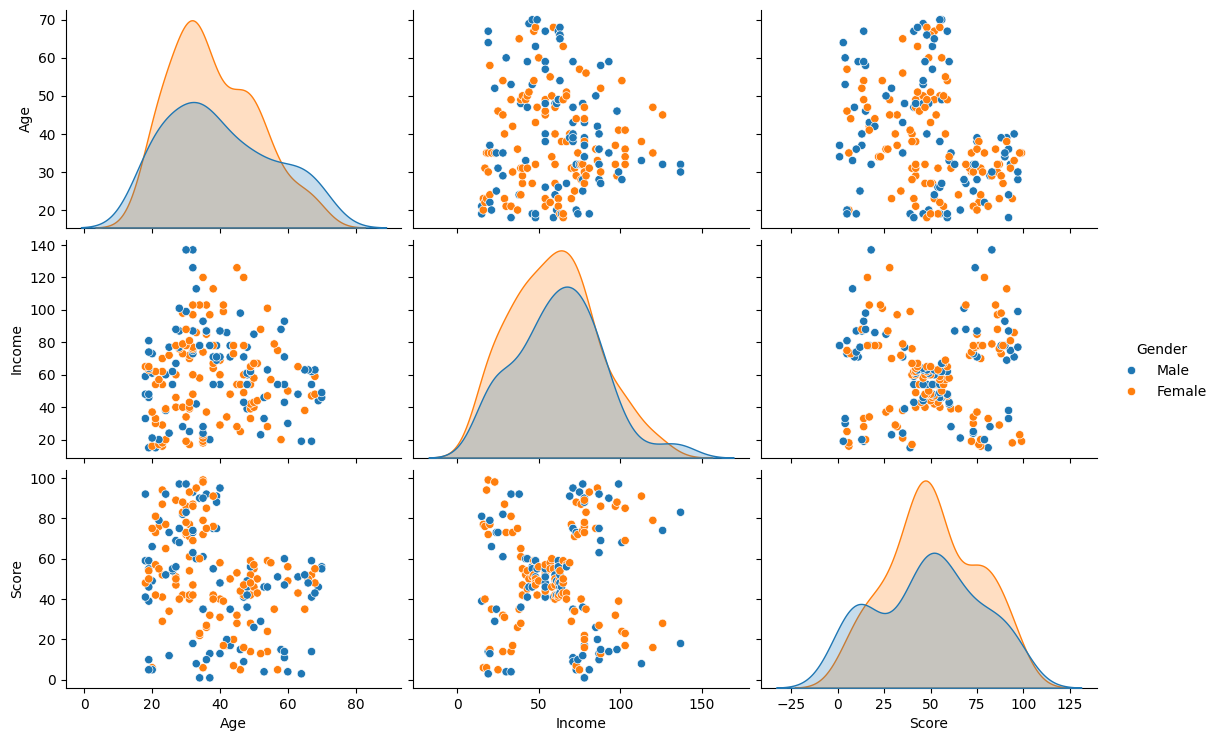

In [5]:
sns.pairplot(d.drop("CustomerID", axis=1), hue="Gender", aspect=1.5)
plt.show()
plt.close()

## Seleção do número de clusters com o Método do Joelho

Para criação dos clusters, neste exemplo, apenas serão considerados os atributos Salário (Income) e Gastos (Score)

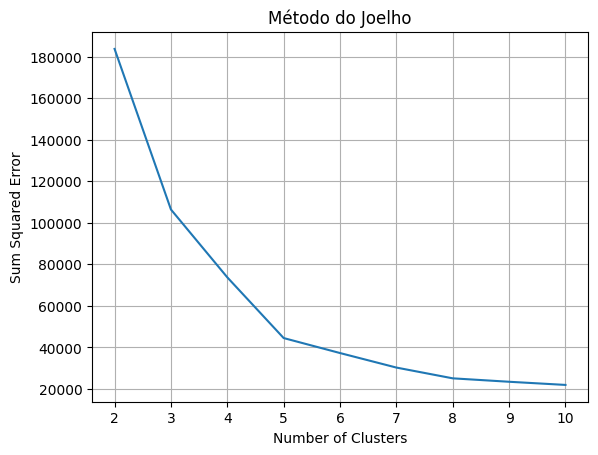

In [6]:
X = d[["Income", "Score"]]
sse = []

for k in range(2, 11):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

### Conclusões:
- Os melhores pontos são as "extremidades" do joelho.
- Neste caso, corresponde ao número de clusters igual a 3 e 5.

## Seleção do número de clusters com a métrica Silhouette

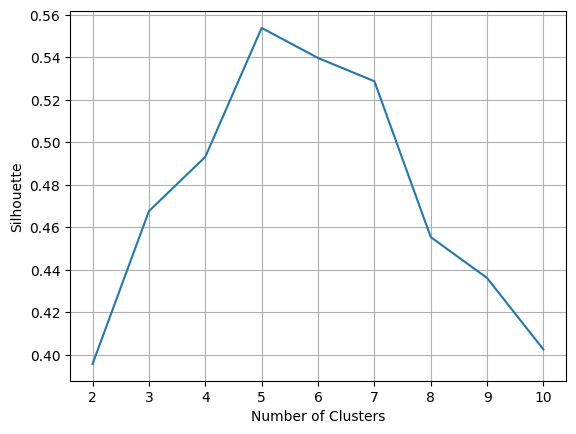

In [7]:
X = d[["Income", "Score"]]
silhouette = []

for k in range(2, 11):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X)
    ss = silhouette_score(X, clusters)
    silhouette.append(ss)

# visualize results
plt.plot(range(2, 11), silhouette)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette")
plt.grid()
plt.show()
plt.close()

### Conclusões:
- A métrica Silhouette considera as distância média interna no clusters e a distância ao cluster mais próximo.
- Esta métrica pode tomar valores entre 1 (melhor) e -1 (pior).
- Valores próximos de 0 significam que os clusters se sobrepõem, enquanto que valores negativos significa que os pontos foram atribuídos a clusters errados.
- Neste caso, o número de clusters igual a 5 obtém o melhor valor de Silhouette. Este valor foi também identificado no método anterior.

## Análise utilizando 3 clusters

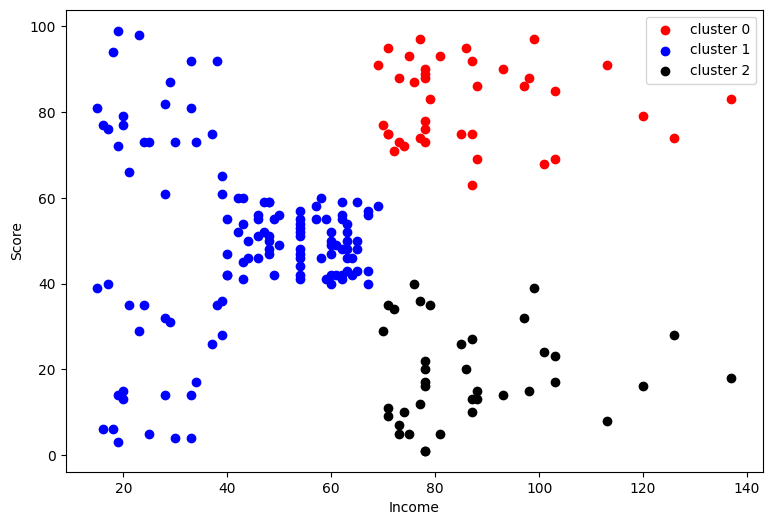

In [8]:
kmeans = KMeans(n_clusters=3, random_state=12345)
clusters = kmeans.fit_predict(X)
X["cl"] = clusters
X.sort_values(by="cl", inplace=True)

clusters = X.cl.unique()


plt.figure(figsize=(9, 6))
for cluster in clusters:
    Xcluster = X.query(f"cl == {cluster}")
    plt.scatter(
        Xcluster["Income"],
        Xcluster["Score"],
        c=COLORS[cluster],
        label=f"cluster {cluster}",
    )


plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.close()

### Conclusões:
- Cluster 0: Salário médio/alto, gastos elevados;
- Cluster 1: Salário médio/baixo (demasiado abrangente).
- Cluster 2: Salário médio/alto, gastos elevados;

## Análise utilizando 5 clusters

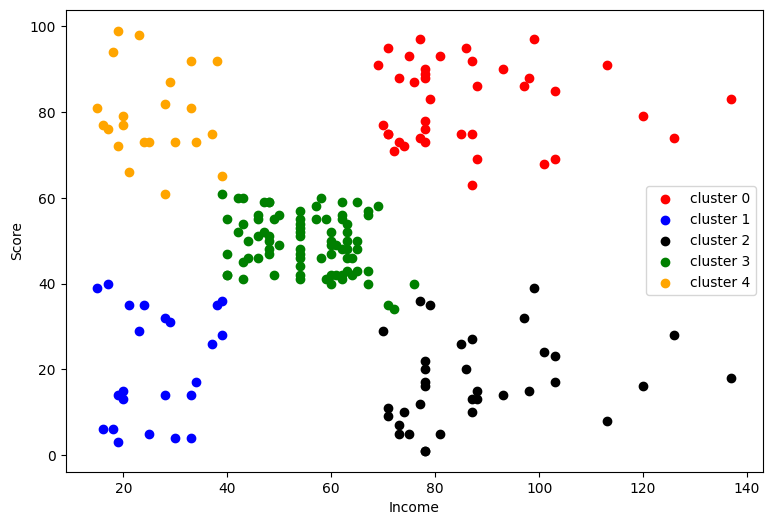

In [9]:
X = d[["Income", "Score"]]
kmeans = KMeans(n_clusters=5, random_state=12345)
clusters = kmeans.fit_predict(X)
X["cl"] = clusters
X.sort_values(by="cl", inplace=True)

clusters = X.cl.unique()


plt.figure(figsize=(9, 6))

for cluster in clusters:

    Xcluster = X.query(f"cl == {cluster}")
    plt.scatter(
        Xcluster["Income"],
        Xcluster["Score"],
        c=COLORS[cluster],
        label=f"cluster {cluster}",
    )

plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.close()

### Conclusões:
- Cluster 0: Salário médio/alto, gastos elevados;
- Cluster 1: Salário baixo, gastos reduzidos;
- Cluster 2: Salário médio/alto, gastos elevados;
- Cluster 3: Salário médio, gastos médios;
- Cluster 4: Salário baixo, gastos elevados.